---

# <center> ★ Machine Learning Project - Ad Budget Estimation ★
#### <center> ***Domain: Automotive***

---

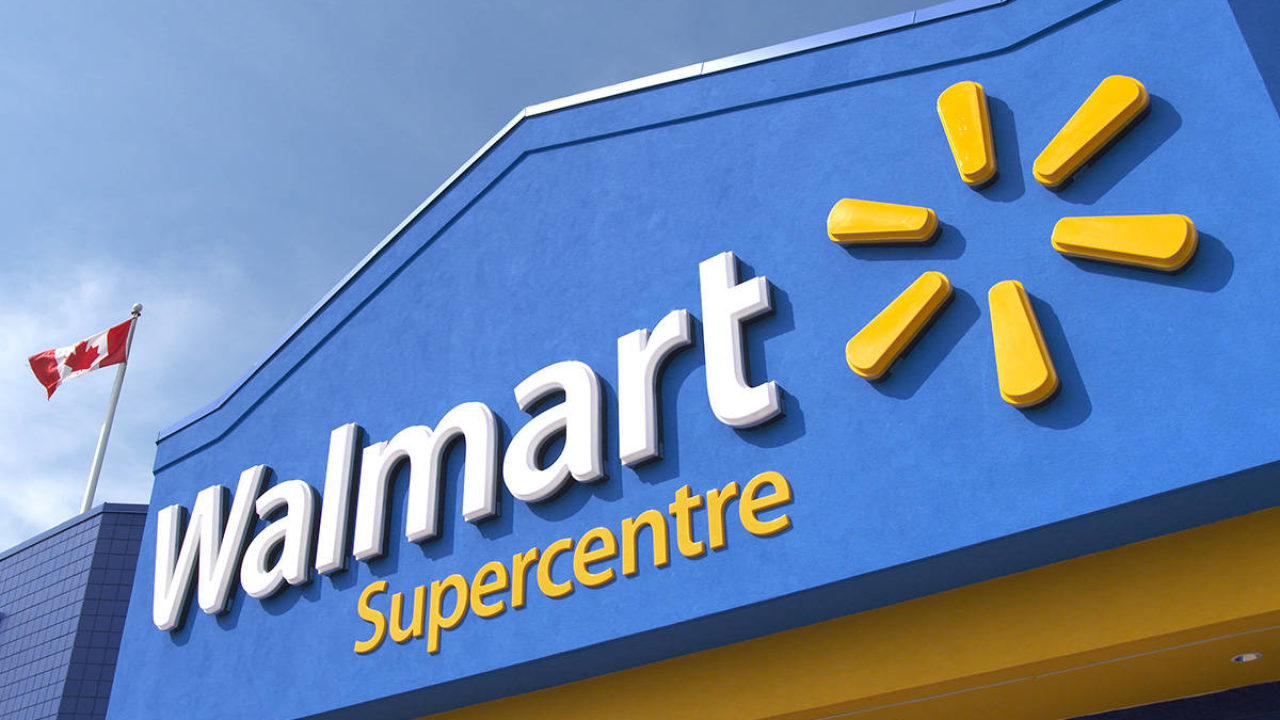

In [4]:
from IPython import display
display.Image('https://raw.githubusercontent.com/Masterx-AI/Project_Retail_Analysis_with_Walmart/main/Wallmart1.jpg')

---

### Description:

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

Dataset Info:\
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:\
* Store - the store number
* Date - the week of sales
* Weekly_Sales -  sales for the given store
* Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
* Temperature - Temperature on the day of sale
* Fuel_Price - Cost of fuel in the region
* CPI – Prevailing consumer price index
* Unemployment - Prevailing unemployment rate
* Holiday Events\
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### Acknowledgements
The dataset is taken from Kaggle.

### Objective:
- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the sales w.r.t a single & multiple feature.
- Also evaluate the models & compare their respective scores like R2, RMSE, etc.

---

# <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion

---

# <center>1. Data Exploration

In [5]:
#Importing the basic librarires

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [6]:
#Importing the dataset
# CHANGE
df = pd.read_csv('walmart.csv')

#df.drop(['car name'], axis=1, inplace=True)
display(df.head())

original_df = df.copy(deep=True)

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106



Inference: The Datset consists of 8 features & 6435 samples.


In [7]:
# Reframing the columns

df.Date=pd.to_datetime(df.Date)

df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

# df['Monthly_Quarter'] = df.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
#                                       8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})

df.drop(['Date'], axis=1, inplace=True)#,'month'

target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]]
original_df = df.copy(deep=True)

df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [8]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   year          6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


In [9]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

Holiday_Flag       2
year               3
weekday            7
month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [10]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=45:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 4 numerical & 5 categorical features.


In [11]:
#Checking the stats of all the columns

display(df.describe())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,3.573427,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.426581,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,6.000000,12.000000,2012.000000


**Inference:** The stats seem to be fine, let us do further analysis on the Dataset

---

# <center> 2. Exploratory Data Analysis (EDA)

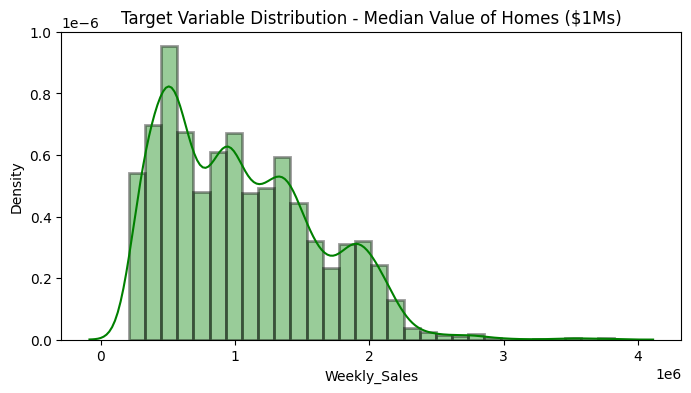

In [12]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

**Inference:**The Target Variable seems to be be normally distributed, averaging around 20 units.

                               Visualising Categorical Features:                                


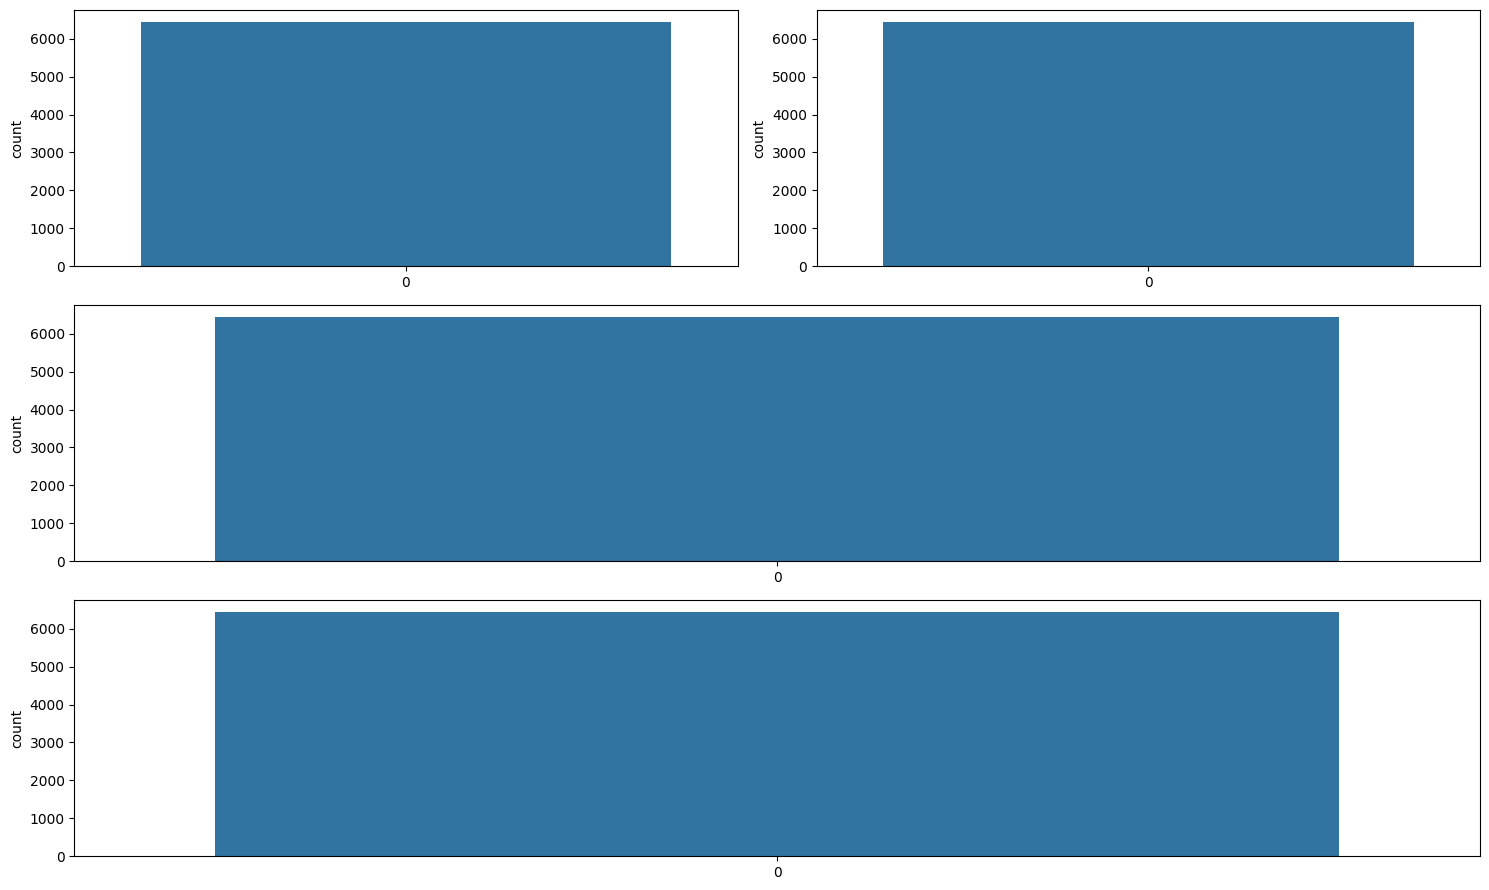

In [13]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,i-1)
        sns.countplot(df[cf[i]])

plt.tight_layout()
plt.show()

**Inference:** There are no categorical features in the dataset.

                                                Numeric Features Distribution                                                 


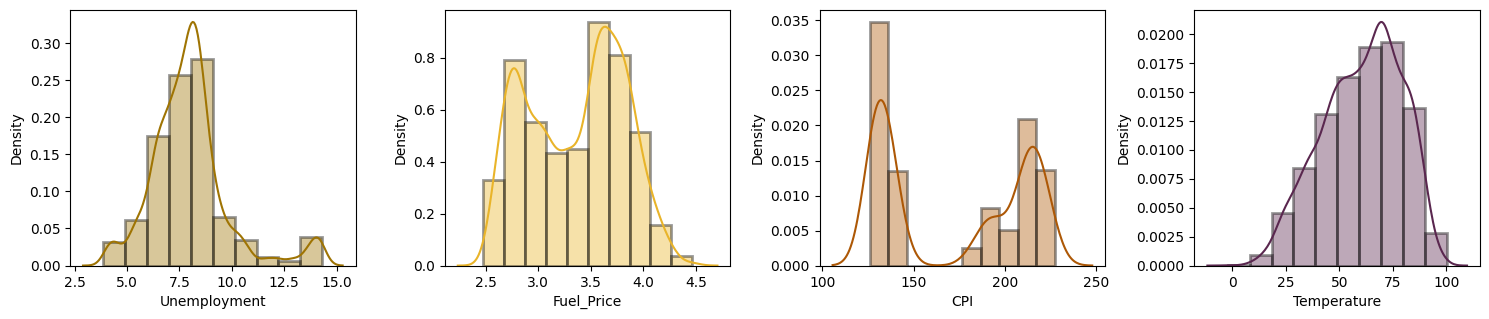

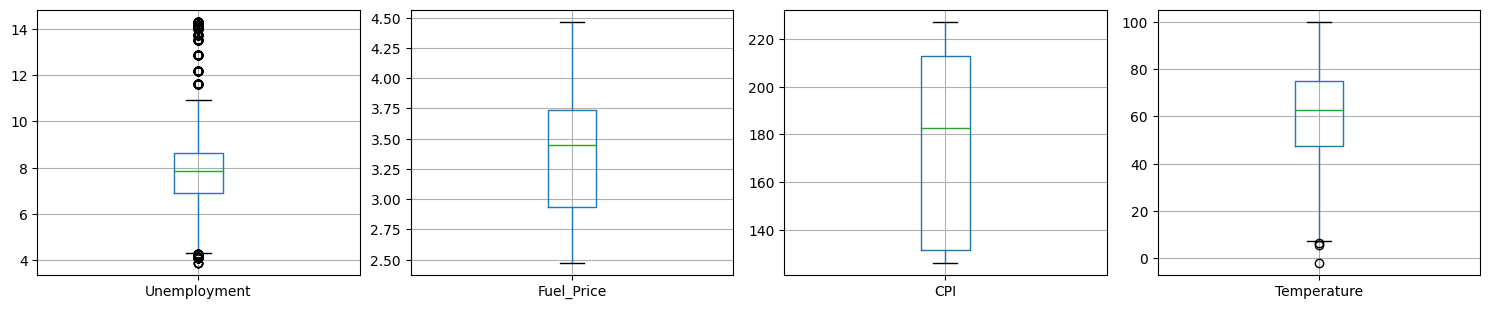

In [14]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

n=4

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

**Inference:** There seem to be some outliers. let us fix these in the upcoming section...

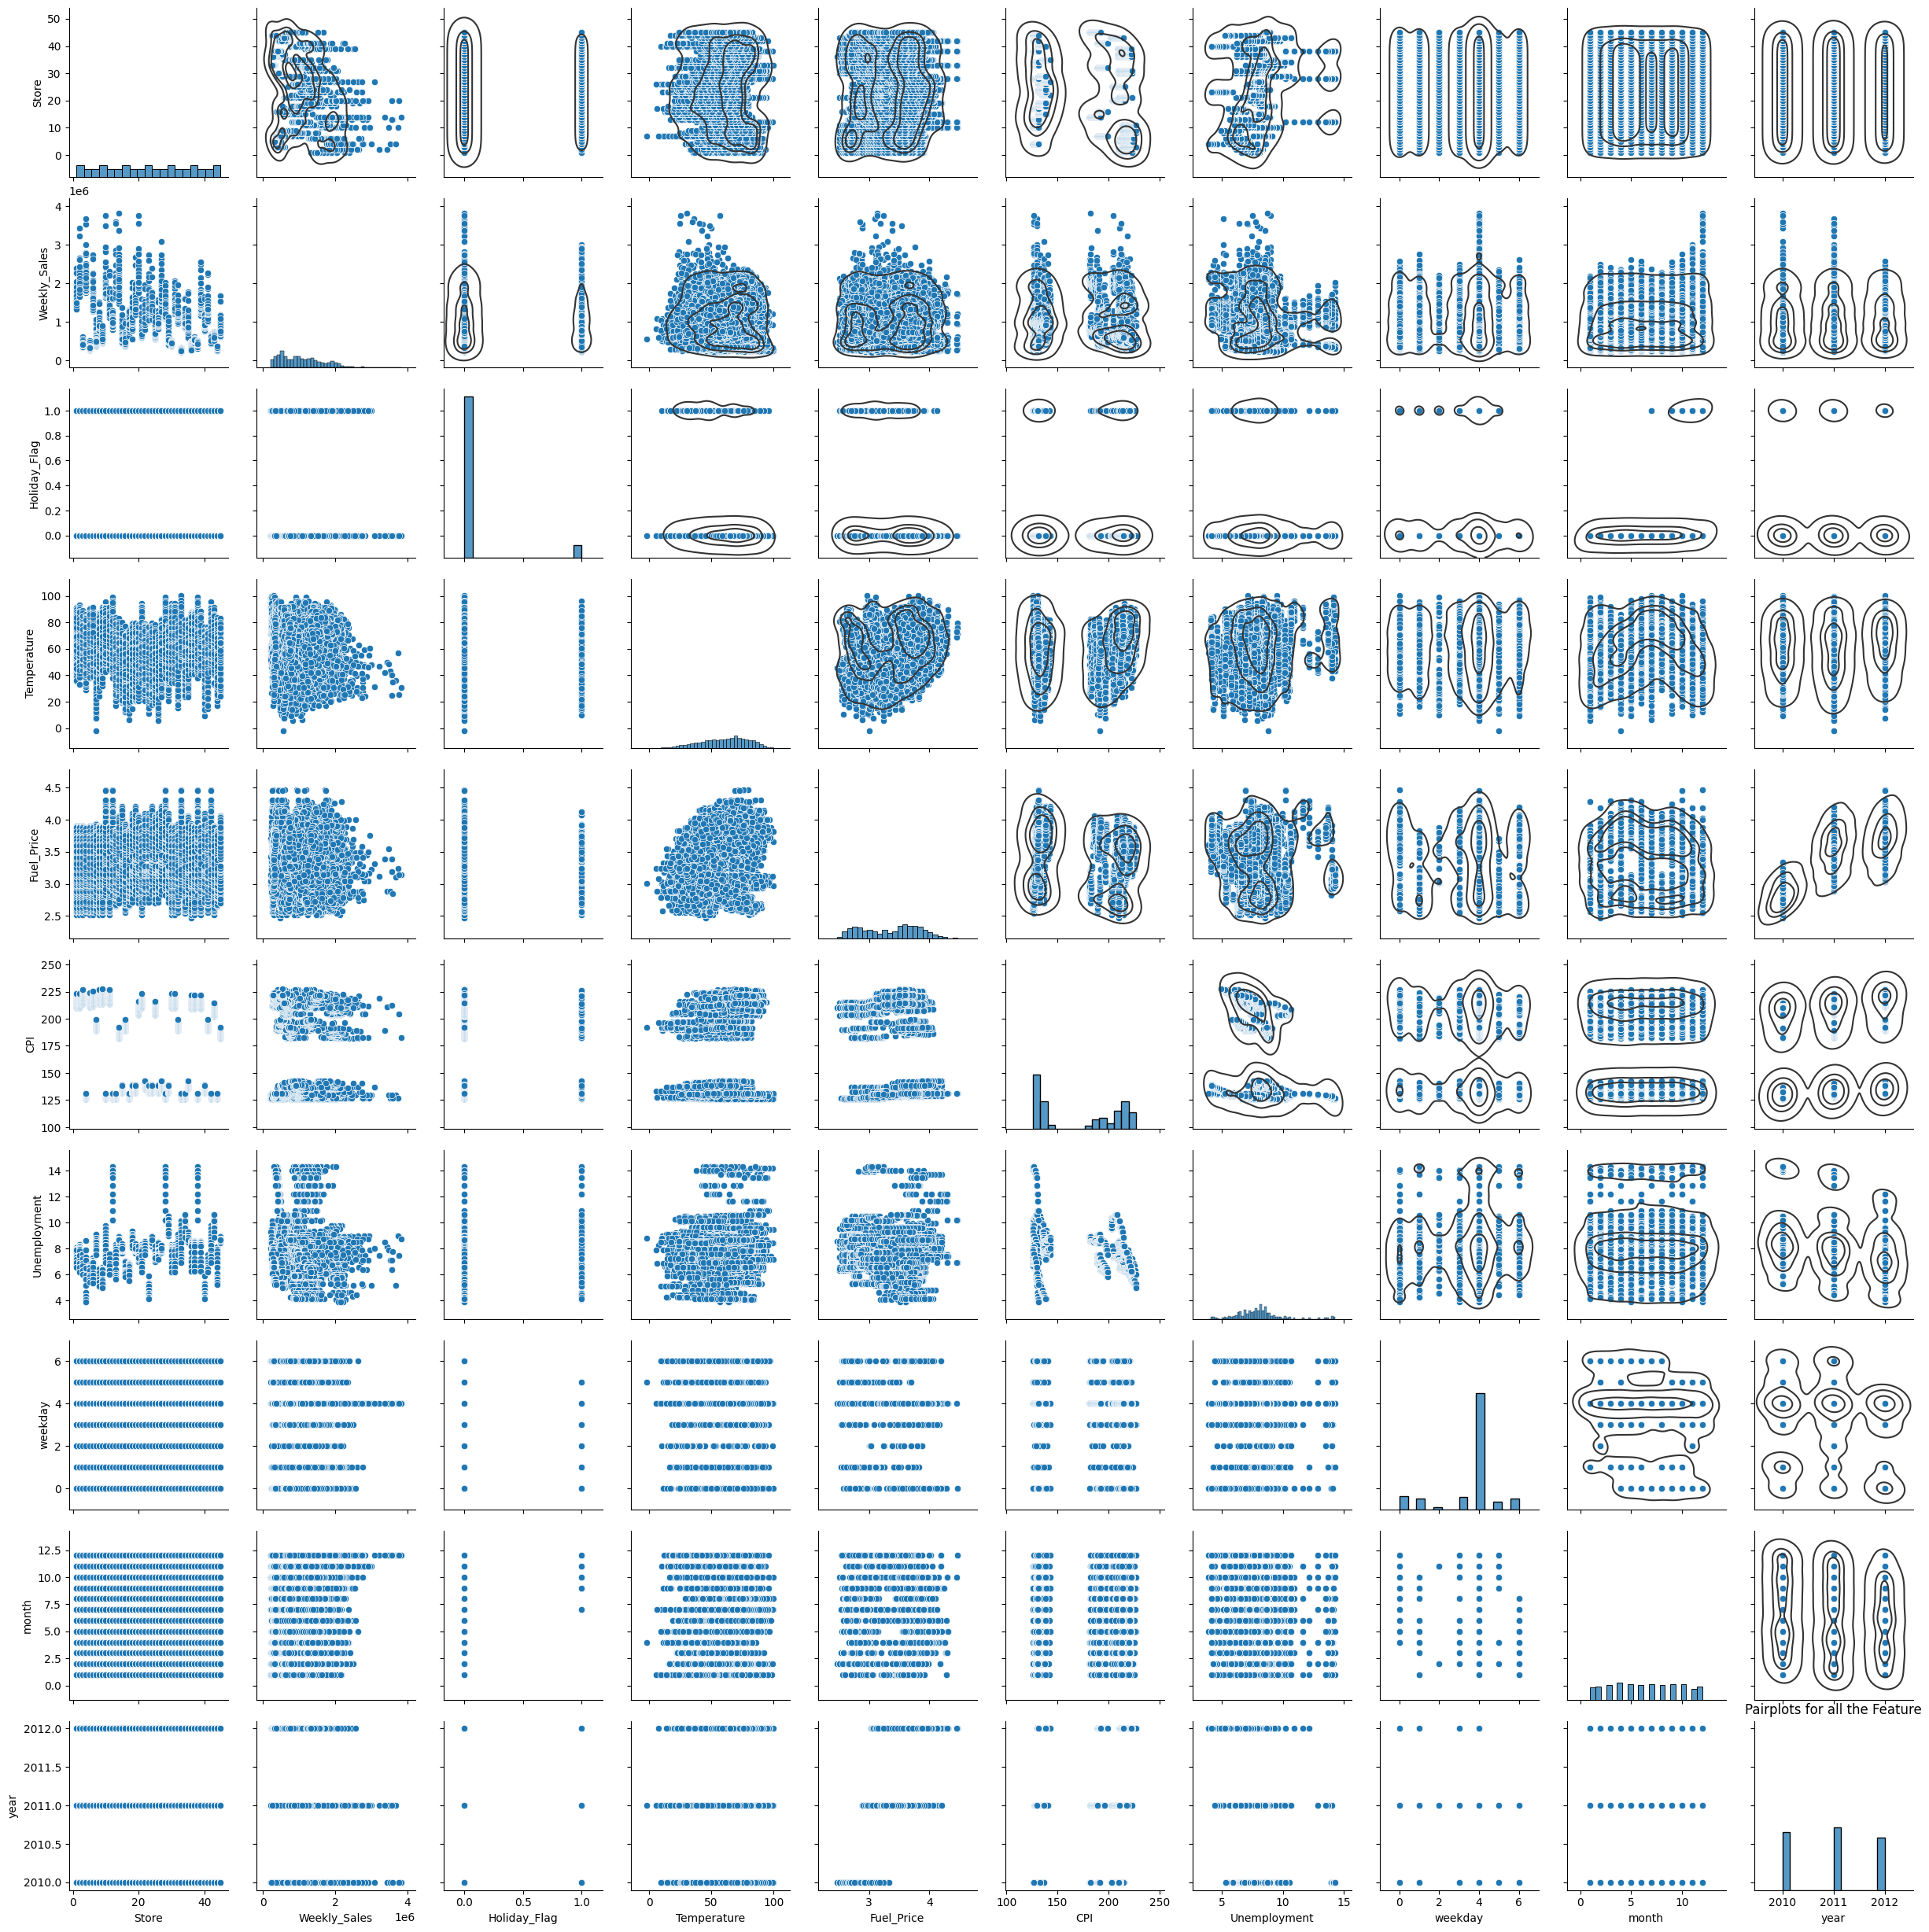

In [15]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

**Inference:** We can notice that some features have linear relationship, let us futher analyze the detect multicollinearity.

---

# <center> 3. Data Preprocessing

In [16]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [17]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

              Total Null Values  Percentage
Store                         0         0.0
Weekly_Sales                  0         0.0
Holiday_Flag                  0         0.0
Temperature                   0         0.0
Fuel_Price                    0         0.0
CPI                           0         0.0
Unemployment                  0         0.0
weekday                       0         0.0
month                         0         0.0
year                          0         0.0


**Inference:** The datset doesn't have any inconsistant values.

In [18]:
#Converting categorical Columns to Numeric

df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

One-Hot Encoding on features:
Holiday_Flag

Dummy Encoding on features:
year
weekday
month
Store


(6435, 69)

In [19]:
# for x in [i for i in ecc if i in cf]:
#     a = df3[x]
#     b=[]; c=[]

#     df4 = df3.copy()
#     df4.drop(ecc, axis=1, inplace=True)
#     df4

#     for i,e in enumerate(a):
#         if e!=e:
#             b.append(i)
#         else:
#             c.append(i)

#     RF = RandomForestClassifier()
#     RF.fit(df4.loc[c],a[c])
#     d = RF.predict(df4.loc[b])

#     f=0
#     for i,e in enumerate(df3[x]):
#         if e!=e:
#             df3.loc[i,x] = d[f]
#             f+=1
# df1 = df3.copy()
# df1

In [20]:
# #Converting categorical Columns to Numeric

# df3 = df.copy()

# gcc = nvc[nvc['Percentage']!=0].index.values
# hcc = [i for i in cf if i not in gcc]

# #One-Hot Binay Encoding
# oh=True
# dm=True
# for i in hcc:
#     #print(i)
#     if df3[i].nunique()==2:
#         if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
#         print(i);oh=False
#         df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
#     if (df3[i].nunique()>2 and df3[i].nunique()<17):
#         if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
#         print(i);dm=False
#         df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
# df3.shape

In [21]:
# for x in gcc:
#     a = df3[x]
#     b=[]; c=[]

#     df4 = df3.copy()
#     df4.drop([x], axis=1, inplace=True)
    
#     for i,e in enumerate(a):
#         if e!=e:
#             b.append(i)
#         else:
#             c.append(i)
        
#     LR = LinearRegression()
#     LR.fit(df4.loc[c],a[c])
#     d = LR.predict(df4.loc[b])
        
#     f=0
#     for i,e in enumerate(df3[x]):
#         if e!=e:
#             df3.loc[i,x] = d[f]
#             f+=1
# df3

In [22]:
#Removal of outlier:

df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year_2011,year_2012,weekday_1,weekday_2,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1641957.44,1,38.51,2.548,211.242170,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Inference:
Before removal of outliers, The dataset had 6435 samples.
After removal of outliers, The dataset now has 5953 samples.


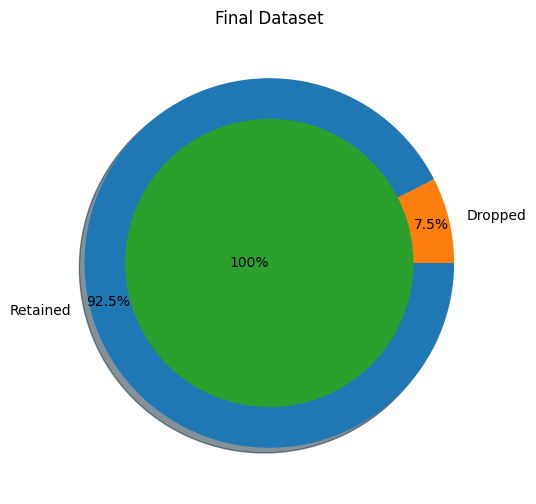


Inference: After the cleanup process, 482 samples were dropped, while retaining 7.49% of the data.


In [23]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

---

# <center> 4. Data Manipulation

In [24]:
#Splitting the data intro training & testing sets

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (5953, 68) (5953,) 
Training set  --->  (4762, 68) (4762,) 
Testing set   --->  (1191, 68)  (1191,)


In [25]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year_2011,year_2012,weekday_1,weekday_2,weekday_3,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
count,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,...,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03
mean,-1.492110e-18,-1.305596e-16,-2.991680e-16,-2.762268e-16,-4.267434e-16,-5.520807e-17,1.939743e-17,4.513632e-17,1.492110e-18,-3.245339e-17,...,1.529413e-17,4.923963e-17,8.952659e-18,1.342899e-17,-3.730275e-18,-1.492110e-17,3.730275e-17,-2.984220e-17,-4.774752e-17,2.499284e-17
std,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,...,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00
min,-2.742012e-01,-2.961575e+00,-1.871814e+00,-1.248731e+00,-2.762670e+00,-7.526270e-01,-6.371530e-01,-2.588345e-01,-1.157891e-01,-2.719813e-01,...,-1.573123e-01,-1.587085e-01,-4.351484e-02,-1.580118e-01,-1.307162e-01,-1.537717e-01,-1.573123e-01,-1.628322e-01,-1.551967e-01,-1.523346e-01
25%,-2.742012e-01,-7.314248e-01,-9.886990e-01,-1.076949e+00,-6.783836e-01,-7.526270e-01,-6.371530e-01,-2.588345e-01,-1.157891e-01,-2.719813e-01,...,-1.573123e-01,-1.587085e-01,-4.351484e-02,-1.580118e-01,-1.307162e-01,-1.537717e-01,-1.573123e-01,-1.628322e-01,-1.551967e-01,-1.523346e-01
50%,-2.742012e-01,1.062547e-01,1.663112e-01,3.842133e-01,9.596435e-02,-7.526270e-01,-6.371530e-01,-2.588345e-01,-1.157891e-01,-2.719813e-01,...,-1.573123e-01,-1.587085e-01,-4.351484e-02,-1.580118e-01,-1.307162e-01,-1.537717e-01,-1.573123e-01,-1.628322e-01,-1.551967e-01,-1.523346e-01
75%,-2.742012e-01,7.731979e-01,8.427860e-01,9.933828e-01,6.138095e-01,1.328679e+00,1.569482e+00,-2.588345e-01,-1.157891e-01,-2.719813e-01,...,-1.573123e-01,-1.587085e-01,-4.351484e-02,-1.580118e-01,-1.307162e-01,-1.537717e-01,-1.573123e-01,-1.628322e-01,-1.551967e-01,-1.523346e-01
max,3.646958e+00,2.170008e+00,2.469806e+00,1.340791e+00,2.575491e+00,1.328679e+00,1.569482e+00,3.863473e+00,8.636394e+00,3.676723e+00,...,6.356783e+00,6.300861e+00,2.298067e+01,6.328643e+00,7.650163e+00,6.503146e+00,6.356783e+00,6.141290e+00,6.443435e+00,6.564495e+00



                                          Standardardization on Testing set                                          


,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year_2011,year_2012,weekday_1,weekday_2,weekday_3,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
count,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,...,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,0.005646,0.044406,0.075113,0.021041,-0.050953,0.052984,0.065042,0.007679,0.038532,0.026409,...,-0.004168,-0.017693,0.111140,-0.010959,-0.000055,0.030677,-0.004168,-0.056970,0.016556,0.045053
std,1.009885,1.000220,0.971917,1.004644,1.010206,1.014188,1.028250,1.014142,1.152364,1.044095,...,0.987401,0.944330,1.881448,0.965939,1.000214,1.093088,0.987401,0.810380,1.051077,1.134875
min,-0.274201,-2.857425,-1.780457,-1.248731,-2.762670,-0.752627,-0.637153,-0.258834,-0.115789,-0.271981,...,-0.157312,-0.158708,-0.043515,-0.158012,-0.130716,-0.153772,-0.157312,-0.162832,-0.155197,-0.152335
25%,-0.274201,-0.657516,-0.852751,-1.077025,-0.699355,-0.752627,-0.637153,-0.258834,-0.115789,-0.271981,...,-0.157312,-0.158708,-0.043515,-0.158012,-0.130716,-0.153772,-0.157312,-0.162832,-0.155197,-0.152335
50%,-0.274201,0.187351,0.298996,0.393492,0.058860,-0.752627,-0.637153,-0.258834,-0.115789,-0.271981,...,-0.157312,-0.158708,-0.043515,-0.158012,-0.130716,-0.153772,-0.157312,-0.162832,-0.155197,-0.152335
75%,-0.274201,0.818764,0.844961,1.019967,0.611390,1.328679,1.569482,-0.258834,-0.115789,-0.271981,...,-0.157312,-0.158708,-0.043515,-0.158012,-0.130716,-0.153772,-0.157312,-0.162832,-0.155197,-0.152335
max,3.646958,2.035481,2.469806,1.345814,2.575491,1.328679,1.569482,3.863473,8.636394,3.676723,...,6.356783,6.300861,22.980668,6.328643,7.650163,6.503146,6.356783,6.141290,6.443435,6.564495


---

# <center> 5. Feature Selection/Extraction

In [ ]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

                                       Correlation Matrix                                       


**Inference:** There seems to be strong multi-correlation between the features. Let us try to fix these...

In [ ]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

 ---

**Approach:** 
We can fix these multicollinearity with two techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)
3. Feature Elmination using PCA Decomposition

## 5a. Manual Method - VIF

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
#Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
#Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

DROP=[];b=[]

for i in range(len(Train_X_std.columns)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

        #Trd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
        #Tsd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)
        
print('Dropped Features --> ',DROP)
#plt.plot(b)
#plt.show()
#print(API.summary())

# plt.figure(figsize=[20,4])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

## 5b. Automatic Method - RFE

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-2
for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

# plt.figure(figsize=[20,4])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

## 5c. Feature Elmination using PCA Decomposition

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-1

for i in range(m):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)
    
    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

# plt.figure(figsize=[20,4.5])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.5,20.75])
plt.legend()
plt.grid()
plt.show()

#### Inference:
It can be seen that the performance of the modelsis quiet comparable unpon dropping features using VIF, RFE & PCA Techniques. Comparing the RMSE plots, the optimal values were found for dropping most  features using manual RFE Technique. But let us skip these for now, as the advanced ML Algorithms take care of multicollinearity.

In [ ]:
#Shortlisting the selected Features (with RFE)

lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-28)             # running RFE
rfe = rfe.fit(Train_X_std, Train_Y)

LR = LinearRegression()
LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

#print(Train_X_std.loc[:,rfe.support_].columns)

pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

print(np.sqrt(mean_squared_error(Train_Y, pred1)))
print(np.sqrt(mean_squared_error(Test_Y, pred2)))

Train_X_std = Train_X_std.loc[:,rfe.support_]
Test_X_std = Test_X_std.loc[:,rfe.support_]

---

# <center> 6. Predictive Modelling

In [ ]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,2,replace=False)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

---

## Objective: 
Let us now try building multiple regression models & compare their evaluation metrics to choose the best fit model both training and testing sets...

## 6a. Multiple Linear Regression(MLR)

<img src="https://raw.githubusercontent.com/Masterx-AI/Master-AI/main/3.%20Machine%20Learning/Z-Etc/Reg/mr.png" style="width: 600px;float: left;"/>

In [ ]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

---

## 6b. Ridge Regression Model

<img src="https://raw.githubusercontent.com/Masterx-AI/Master-AI/main/3.%20Machine%20Learning/Z-Etc/Reg/ridge.png" style="width: 500px;float: left;"/>

In [ ]:
#Creating a Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

---

## 6c. Lasso Regression Model

<img src="https://raw.githubusercontent.com/Masterx-AI/Master-AI/main/3.%20Machine%20Learning/Z-Etc/Reg/lasso.png" style="width: 500px;float: left;"/>

In [ ]:
#Creating a Ridge Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

---

## 6d. Elastic-Net Regression

<img src="https://raw.githubusercontent.com/Masterx-AI/Master-AI/main/3.%20Machine%20Learning/Z-Etc/Reg/en.png" style="width: 500px;float: left;"/>

In [ ]:
#Creating a ElasticNet Regression model

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

---

## 6e. Polynomial Regression Model

<img src="https://raw.githubusercontent.com/Masterx-AI/Master-AI/main/3.%20Machine%20Learning/Z-Etc/Reg/pn.png" style="width: 500px;float: left;"/>

In [ ]:
#Checking polynomial regression performance on various degrees

Trr=[]; Tss=[]
n_degree=4

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0,2e16])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

**Inference:** We can choose 2nd order polynomial regression as it gives the optimal training & testing scores...

In [ ]:
#Using the 2nd Order Polynomial Regression model (degree=2)

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

---

### 6f. Comparing the Evaluation Metics of the Models

In [ ]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

In [ ]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

**Inference:** From the above plot, it is clear that the polynomial regresion models have the highest explainability power  to understand the dataset.

In [ ]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5

plt.bar(np.arange(5), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(5)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(5),EMC.index, rotation =35)
plt.legend()
plt.ylim([0,500000])
plt.show()

**Inference:**\
Lesser the RMSE, better the model! Also, provided the model should have close proximity with the training & testing scores. For this problem, it is can be said that polynomial regressions clearly overfitting the current problem. Surprisingly simple Multiple Linear Regression Model gave the best results. 

---

# <center> 7. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was quiet small with just 6435 samples & after preprocessing 7.5% of the datasamples were dropped. 
- Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
- The features had high multicollinearity, hence in Feature Extraction step, we shortlisted the appropriate features with VIF Technique.
- Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.
- It is safe to use multiple regression algorithm performed better than other algorithms, as their scores were quiet comparable & also they're more generalisable.

In [ ]:
#<<<--------------------------------------------THE END------------------------------------------------>>>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 분석 목적 (Objective)

월마트의 45개의 매장 정보와 월별 매출을 담은 데이터  
월마트는 휴일이 매출에 미치는 영향을 알고 싶어함 (-> 데이터에 휴일 정보 있음)  
분석 목적은 주별 매출을 예측하는 것! + 휴일의 영향 분석

# 데이터 탐색 (Data Exploration)

**2010-02-05 ~ 2012-11-01 월마트 sales 데이터**
- **Store** : the store number
- **Date** : the week of sales
- **Weekly_Sales** : sales for the given store
- **Holiday_Flag** : whether the week is a special holiday week 1 - Holiday week 0 – Non-holiday week
- **Temperature** : Temperature on the day of sale
- **Fuel_Price** : Cost of fuel in the region
- **CPI** : Prevailing consumer price index
- **Unemployment** : Prevailing unemployment rate
- **Holiday Events**
    - Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
    - Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
    - Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
    - Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [ ]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('walmart.csv')
df.head()

In [ ]:
df.info()

In [ ]:
# Date를 년, 월, 요일로 변환

df.Date=pd.to_datetime(df.Date) # datetime 형변환

df['year'] = df.Date.dt.year
df['month'] = df.Date.dt.month
#df['month_quarter'] = df.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
#                                     8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'}) # 분기
df['weekday'] = df.Date.dt.weekday

df.drop(['Date'], axis=1, inplace=True) # date컬럼 제거

In [ ]:
target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]] # feature 리스트생성
original_df = df.copy(deep=True)

print(features)

In [ ]:
# 컬럼별 unique값 개수

df.nunique().sort_values()

In [ ]:
# numerical과 categorical 변수 구분
nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; # nf:numerical 변수 리스트 / nnf 그 개수 / cf: categorical 변수 리스트 / ncf: 그 개수

for i in range(df[features].shape[1]): # shape[1]:열 개
    if nu.values[i]<=45:cf.append(nu.index[i]) # 45개(store개수) 미만이면 categorical / 그 외는 numerical
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))

In [ ]:
print(df.info())
print("-------"*30)
print(df.describe())

# EDA

## Weekly_Sales (target 변수)

In [ ]:
plt.figure(figsize=[10,4])
sns.distplot(df[target], color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

# categorical 변수

In [ ]:
print('\033[1mVisualising Categorical Features:'.center(100))

n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,i-1)
        sns.countplot(df[cf[i]])
        
plt.tight_layout()
plt.show()

## numerical 변수

In [ ]:
print('\033[1mNumeric Features Distribution'.center(130))

n=4

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

outlier들이 보임

# 데이터 전처리 (Data Preprocessing)

In [ ]:
# 중복행 제거

counter = 0
rs,cs = original_df.shape # 튜플형태 행,열 개수

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')

In [ ]:
# null값 체크

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

In [ ]:
# categorical 변수 인코딩

df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]

oh=True # 원핫인코딩
dm=True # 더미인코딩
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape
# categorical 변수 인코딩

df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]

oh=True # 원핫인코딩
dm=True # 더미인코딩
for i in fcc:
    
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    
    if (df3[i].nunique()>2):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

In [ ]:
# 이상치 제거

df1 = df3.copy()

features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
    
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

In [ ]:
# 전처리 전후 결과 시각화

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

# 데이터 가공 (Data Manipulation)

In [ ]:
# train, test 데이터셋 분리

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_')) # 변수명에 짝대기 제
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

In [ ]:
# 피처 스케일링

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

# 변수 선택 (Feature selection)

In [ ]:
# 히트맵

plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

일부 상관관계 높은 변수들이 보임

In [ ]:
# 선형회귀 돌려보기

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
API.summary()

## VIF 이용해서 다중공선성 해결

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]

DROP=[];b=[]

for i in range(len(Train_X_std.columns)):
    
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))
        
print('Dropped Features --> ',DROP)

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

# 모델링(modeling)

## 평가지표 함수 생성

In [ ]:
columns=['Train-R2','Test-R2','Train-RSS','Test-RSS','Train-MSE','Test-MSE','Train-RMSE','Test-RMSE']
Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]),columns=columns)
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,2,replace=False)

def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

## 다중회귀

In [ ]:
MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

## 릿지회귀

In [ ]:
RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

## 라쏘 회귀

In [ ]:
LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

## 엘라스틱넷 회귀

In [ ]:
ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

## 다항(polynomial)회귀

In [ ]:
# various degrees에서 performance 확인

Trr=[]; Tss=[]
n_degree=4

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')

plt.title('Polynomial Regression Fit')

plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()


plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0,2e16])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

In [ ]:
# degree=2로 결정

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

## 모델별 평가지표 확인

In [ ]:
EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

# R2 스코어 비교

In [ ]:
R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

In [ ]:
# RMSE 비교

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5

plt.bar(np.arange(5), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(5)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(5),EMC.index, rotation =35)
plt.legend()
plt.ylim([0,500000])
plt.show()

- 다항회귀는 오버피팅 된 걸 볼 수 있음!   
(RMSE값이 낮은 건 좋은 거지만, train과 test셋 사이의 RMSE값 차이가 크면 안됨)
- 단순 다중선형회귀가 가장 제일 좋은 성과

# 결론

# Answering Five Question On our DataSet
- Walmart Sales Dataset of 45 stores

### By:
- Ayatullah Nabil El-Sayed El-Banhawy

____
### Import numpy and pandas

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import warnings
from datetime import date

### Import visualization libraries and set %matplotlib inline. 

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import seaborn as sns
import plotly.express as px
#--> the matplotlib plots will appear directly below the cell in which the plot function was called.
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
# Read in the csv file as a dataframe called "df"
df = pd.read_csv('walmart.csv')

#print the first 5 rows of the data
df.head()

In [ ]:
#give us summerized number for the columns and the rows 
df.shape

# Data preprocessing

In [ ]:
#find information about data 
df.info()

In [ ]:
# give summrized info about the number of columns and rows of data 
df.shape

In [ ]:
# Missing Values
df.isna().sum()

### Change the name of each store

In [ ]:
df['Store_Num'] = df['Store'].map({value: 'Store ' + str(value) for value in df['Store'].unique().tolist()})

In [ ]:
df

### Adding New Features

#### Adding Date, Month, Year, Holiday Features

## Adding Seasons

Typically Season Starts: 
- Spring: March 21 - June 20
- Summer: June 21 - September 20
- Fall: September 21 - December 20
- Winter: December 21 - March 20

In [ ]:
print(type(df['Date'][0])) #to print type

str(df['Date'][0])[:10] #to make sure from the date type

In [ ]:
#to change the date type 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') 

In [ ]:
#Adding 'Month_Num', 'Month_Name', 'Year'
df['Month_Num'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name().str[:3]
df['Year'] = df['Date'].dt.year

In [ ]:
for x in tqdm(range(df.Year.min() - 1, df.Year.max() + 1)):
    print(x)

In [ ]:
# WHY? tqdm?

In [ ]:
df['Season'] = ''

for x in tqdm(range(df.Year.min() - 1, df.Year.max() + 1)):
    # Spring: March 21 - June 20
    df.loc[(df.Date >= str(x) +'-03-21') & (df.Date <= str(x) +'-06-20'),  'Season'] = 'Spring'
    # Summer: June 21 - September 20
    df.loc[(df.Date >= str(x) +'-06-21') & (df.Date <= str(x) +'-09-20'),  'Season'] = 'Summer'
    # Fall: September 21 - December 20
    df.loc[(df.Date >= str(x) +'-09-21') & (df.Date <= str(x) +'-12-20'),  'Season'] = 'Fall'
    # Winter: December 21 - March 20
    df.loc[(df.Date >= str(x) +'-12-21') & (df.Date <= str(x + 1) +'-03-20'),'Season'] = 'Winter'

In [ ]:
#print the seasons to make sure that all done
df['Season'].unique() 

In [ ]:
df.head()

________________________________
_______________________________________
# Q1: Which store has maximum sales in this dataset?

In [ ]:
# Convert 'date' column into datetime object
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')
print(type(df['Date'][0]))

In [ ]:
df.loc[df['Weekly_Sales'] ==  df['Weekly_Sales'].max()] 
# used to find the row meeting the specific condition, Here we are checking in column Weekly_Sales
# which row or store in particular is having the maximum Weekly_Sales.

#### So we conclude that store 14 has the maximum weekly sales
- Now we will prove this more by visualizing data

##### Columns Rearrange

In [ ]:
#display columns 
df.columns  

In [ ]:
#rearrange columns and store it in new variable 
newCols = ['Store_Num', 'Date', 'Month_Num', 'Month_Name', 'Year','Season', 
           'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

In [ ]:
#change the columns
df = df[newCols]

In [ ]:
df.Year

In [ ]:
#A lambda function can take any number of arguments, but can only have one expression.
#take the years 2010, 2011, 2012 and return it in one columns called Year
df['Year'] = df['Year'].apply(lambda x: str(x))

In [ ]:
df.head()

### Stores with the Annual Sales

In [ ]:
# group the store number and year with the summation of the weekly sales and store it in new variable df1
df1 = df.groupby(['Store_Num','Year']).aggregate({
    'Weekly_Sales':'sum'}).reset_index().sort_values(by='Weekly_Sales',ascending=False)

In [ ]:
df.groupby(['Store_Num','Year']).aggregate({'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

In [ ]:
df1

In [ ]:
#print columns
df1.columns

In [ ]:
#change name of the columns 
new_cols_df1 = ['Store_Num', 'Year', 'Annual_Sales']  

In [ ]:
#update column
df1.columns = new_cols_df1 

In [ ]:
#sort data decendingly
df1.sort_values(by = ['Year', 'Annual_Sales'], ascending = False, inplace  = True) 

In [ ]:
df1.head()

In [ ]:
#to make sure that our data is right 
df1[df1['Store_Num'] == 'Store 4'] 

In [ ]:
fig = px.bar(df1, x = 'Store_Num', y = 'Annual_Sales', color = 'Year', facet_col = 'Year', 
             #facet_row = 'Weather Type', 
             width = 1000, height = 550)

fig.update_layout(title = {"text": "Sales from 2010-2012", "x": 0.5,}, 
                  title_font_color = 'blue', showlegend = False,) #plot_bgcolor = 'black',

fig.update_xaxes(title_text = "Stores", tickmode = 'auto', 
                 showgrid = True, categoryorder = "trace") #tickmode = 'linear'

fig.update_yaxes(title_text = "Annual Sales", showgrid = True)
fig.show()

# Top Stores Each Year

In [ ]:
#group the store number by each year and sum the weekly sales for each store to from an annual sale and print it to find top 5
df_top5_2010 = df.groupby(['Store_Num', 'Year']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

df_top5_2010 = df_top5_2010[df_top5_2010['Year'] == '2010']
df_top5_2010 = df_top5_2010.head(5)


print("\nTOP 5 Stores with Highest Weekly Sales in 2010\n")
df_top5_2010

In [ ]:
#group the store number by each year and sum the weekly sales for each store to from an annual sale and print it to find top 5
df_top5_2011 = df.groupby(['Store_Num', 'Year']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

df_top5_2011 = df_top5_2011[df_top5_2011['Year'] == '2011']
df_top5_2011 = df_top5_2011.head(5)


print("\nTOP 5 Stores with Highest Weekly Sales in 2011\n")
df_top5_2011

In [ ]:
#group the store number by each year and sum the weekly sales for each store to from an annual sale and print it to find top 5
df_top5_2012 = df.groupby(['Store_Num', 'Year']).aggregate({
    'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)

df_top5_2012 = df_top5_2012[df_top5_2012['Year'] == '2012']
df_top5_2012 = df_top5_2012.head(5)


print("\nTOP 5 Stores with Highest Weekly Sales in 2012\n")
df_top5_2012

In [ ]:
fig = make_subplots(rows = 1, cols = 3, subplot_titles = ["2010", "2011", "2012"])

fig.add_trace(go.Bar(x = df_top5_2010['Store_Num'],
                     y = df_top5_2010['Weekly_Sales'],
                     name = "2010"
                    ),
                    row = 1, col = 1)

fig.add_trace(go.Bar(x = df_top5_2011['Store_Num'],
                     y = df_top5_2011['Weekly_Sales'],
                     name = "2011"
                    ),
                    row = 1, col = 2)

fig.add_trace(go.Bar(x = df_top5_2012['Store_Num'],
                     y = df_top5_2012['Weekly_Sales'],
                     name = "2012"
                    ),
                    row = 1, col = 3)

fig.update_layout(title_text = "Top 5 Stores Each Year", title_x = 0.5, width = 1000, height = 350)

fig.show()

### Store 14 has maximum sales annualy #1

____________________
______________________________
#  Q2: Which store has maximum standard deviation


In [ ]:
#Grouping by store to find the standard deviation and mean of each store.
max_std = pd.DataFrame(df.groupby('Store_Num').agg({'Weekly_Sales':['std','mean']}))

#Resetting the index.
max_std = max_std.reset_index()

#Now we know that Coefficient of Variation(CoV) is (std/ mean)*100 we are doing this for each store.
#max_std['CoV'] = (max_std[('Weekly_Sales','std')] / max_std[('Weekly_Sales','mean')]) *100

#finding the store with maximum standard deviation.
max_std.loc[max_std[('Weekly_Sales','std')] == max_std[('Weekly_Sales','std')].max()]

### Let's Explaine this by visualizing our data

In [ ]:
df_std = df.groupby(['Store_Num']).aggregate({
    'Weekly_Sales': 'std'}).reset_index()

df_std.columns = ['Store_Num', 'STD_of_Weekly_Sales']
df_std.sort_values(by = 'STD_of_Weekly_Sales', inplace = True, ascending = False)

print("\nTOP 5 Stores with Weekly Sales varying a lot\n")
df_std.head()

In [ ]:
df_std.set_index('Store_Num').head(5).plot(kind = 'bar')
plt.xlabel("Stores")
plt.ylabel("STD of Weekly Sales")
plt.title("TOP 5 Stores with Weekly Sales varying a lot")
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### Store 14 has the maximum standard deviation #2

____________________________
_______________________________
# Q3:  Some holidays have a negative impact on sales. Find out holidays that have higher sales than the mean sales in the non-holiday season for all stores together

In [ ]:
dff = pd.read_csv('walmart.csv')

In [ ]:
mean_sales_non_holiday = dff[(dff['Holiday_Flag'] == 0)]['Weekly_Sales'].mean()
print(mean_sales_non_holiday)

In [ ]:
mean_sales_holiday = dff[(dff['Holiday_Flag'] == 1)]['Weekly_Sales'].mean()
print(mean_sales_holiday)

In [ ]:
fig, ax = plt.subplots(figsize=[8,6])
sns.barplot(data = dff, x = dff['Holiday_Flag'], y = dff['Weekly_Sales'])
ax.set_title("Holyday Vs. Weekly_Sales", fontsize = 16);

- We conclude that the weekly sales increases when it's holyday 

_________________________________
________________________________
# Q4: Provide a monthly and semester view of sales in units and give insights

### Monthly sales

In [ ]:
monthly = df.groupby(pd.Grouper(key='Date', freq='1M')).sum()     # groupby each 1 month
monthly = monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')

### Semester Sales 

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
X = df['Season']
Y = df['Weekly_Sales']
plt.scatter(X,Y)
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')

- We can observe from the Monthly Sales Graph that highest sum of sales is recorded in between jan-2011 to march-2011
- We can Observe from Semester Sales graph that consumers are likly to buy in winter 

________________________________________
__________________________________________
# Q5: Plot the relations between weekly sales vs. other numeric features and give insights.

#### Numerical features
- Temperature 
- CPI
- Fuel_Price
- Unemployment

## 1-Temperature Vs. Weekly_Sales:

### Temperature in Categories 

In [ ]:
bins=[-2.06,20,40,60,80,100.14]
labels =['< 20','From 20 To 40','From 40 To 60','From 60 To 80','> 80']
df['Temperature Category'] = pd.cut(df['Temperature'], bins, labels = labels)
df.head()

In [ ]:
temp = df['Temperature Category'] 
temp

In [ ]:
fig, ax = plt.subplots(figsize=[10,6])
labels = ['< 20','From 20 To 40','From 40 To 60','From 60 To 80','> 80']
colors = ['tomato', "deepskyblue", "gold", "limegreen", "gray"]
ax.pie(x = temp.value_counts(), autopct = "%.1f%%", explode = [0.05]*5, 
       colors = colors, labels = labels, pctdistance = 0.5) 
ax.set_title("Temp in Fahrenhite", fontsize = 16);
plt.show()

- from the above chart we conclude that the most common / repeated degree is between 60 and 80 C

### Temp in F Vs. Weekly_Sales

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
x = temp
y = df['Weekly_Sales']
sns.stripplot(data = df , x = "Temperature Category", y = "Weekly_Sales", ax = ax)
ax.set_title("Temp in F Vs. Weekly_Sales", fontsize = 16);

From the above Chart we can conclude that :
1. the Sales was at it's top when the temperature ranges between 20 F and 60 F
2. the lowest Sales scored when the temperature is less than 20 F


### Relation between the Temperature and the top-5 stores' weekly_sales

In [ ]:
fig = make_subplots(rows = 1, cols = 3, subplot_titles = ["2010", "2011", "2012"])

fig.add_trace(go.Bar(x = temp,
                     y = df_top5_2010['Weekly_Sales'],
                     name = "Temp in 2010"
                    ),
                    row = 1, col = 1)

fig.add_trace(go.Bar(x = temp,
                     y = df_top5_2011['Weekly_Sales'],
                     name = "Temp in 2011"
                    ),
                    row = 1, col = 2)

fig.add_trace(go.Bar(x = temp,
                     y = df_top5_2012['Weekly_Sales'],
                     name = "Temp in 2012"
                    ),
                    row = 1, col = 3)

fig.update_layout(title_text = "Relations between Temperature vs. Weekly_Sales in the three years for the top 5 stores", 
                  title_x = 0.5, width = 1000, height = 300)

fig.show()

From the above plot we can conclude that :
1. The highest weekly sales were in 2011 between 40F and 60F
2. The lowest weekly sales were in 2012 between 20F and 40F

## 2- CPI Vs. Weekly_Sales:

### CPI(Prevailing Consumer Price Index)

In [ ]:
CPI = df['CPI']

In [ ]:
CPI1 = CPI.round(0)

In [ ]:
CPI1.dropna()

In [ ]:
CPI1 =  CPI1.drop_duplicates()
CPI1

In [ ]:
CPI = df[["CPI"]]
CPI.boxplot()
plt.show()

From the above the plot we can conclude :
1. The Min CPI scored is approximately 125
2. The Max CPI scored is approximately 225
3. The Mean CPI scored is approximately 185

### The relation between CPI Vs. Weekly Sales


In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df["CPI"], y = df["Weekly_Sales"])
plt.show()

From the above plot we can conclude that :
1. The Majority of sales have a CPI greater than 180 , In other words Most of the sales have a CPI greater than the mean which is 185


### Relation between the CPI and the top-5 stores' weekly_sales

In [ ]:
fig = make_subplots(rows = 1, cols = 3, subplot_titles = ["2010", "2011", "2012"])

fig.add_trace(go.Bar(x = CPI1,
                     y = df_top5_2010['Weekly_Sales'],
                     name = "CPI in 2010"
                    ),
                    row = 1, col = 1)

fig.add_trace(go.Bar(x = CPI1,
                     y = df_top5_2011['Weekly_Sales'],
                     name = "CPI in 2011"
                    ),
                    row = 1, col = 2)

fig.add_trace(go.Bar(x = CPI1,
                     y = df_top5_2012['Weekly_Sales'],
                     name = "CPI in 2012"
                    ),
                    row = 1, col = 3)

fig.update_layout(title_text = "Relations between CPI vs. Weekly_Sales in the three years for the top 5 stores", 
                  title_x = 0.5, width = 1000, height = 300)

fig.show()

From the above plot we can conclude that :
1. The highest weekly sales were in 2011 when the CPI was 211 which it was 111.0923M 
2. We conclude that the CPI = 211 acheived the highest weekly sales among the three years presented 


## 3- Fuel price Vs. Weekly_Sales:

### Fuel Price

In [ ]:
bins=[2.472,3.5,4.468]
labels =['From 2.4 to 3.5','From 3.5 To 4.4']
df['FuelPriceCategory'] = pd.cut(df['Fuel_Price'],bins,labels =labels)
df.head()

In [ ]:
fuel = df["FuelPriceCategory"]

In [ ]:
fuel1 = fuel.drop_duplicates()

In [ ]:
fuel1 = fuel1.dropna()

In [ ]:
fuel1.head()

In [ ]:
fuel2 = df[["Fuel_Price"]]
fuel2.boxplot()
plt.show()

From the above plot we can conclude that:
1. The lowest fuel price scored is approximately 2.4
2. The highest fuel price scored is approximately 4.4
3. The mean fuel price scored is approximately 3.4

### The relation between Fuel Price and Weekly Sales

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
x = fuel1
y = df['Weekly_Sales']
sns.stripplot(data = df , x = "FuelPriceCategory", y = "Weekly_Sales", ax = ax)
ax.set_title("Fuel_Price Vs. Weekly_Sales", fontsize = 16);

From the above plot we can conclude that:
1. The Sales was at it's top when the fuel price was less than 3.5
    - We can say that the highest sales is when the fuel price is less than the mean which is 2.4
2. The highest fuel price, The lowest sales.

### Relation between the Fuel_Price and the top-5 stores' weekly_sales

In [ ]:
fig = make_subplots(rows = 1, cols = 3, subplot_titles = ["2010", "2011", "2012"])
fig.add_trace(go.Bar(x = fuel1,
                     y = df_top5_2010['Weekly_Sales'],
                     name = "Fuel_Price in 2010"
                    ),
                    row = 1, col = 1)

fig.add_trace(go.Bar(x = fuel1,
                     y = df_top5_2011['Weekly_Sales'],
                     name = "Fuel_Price in 2011"
                    ),
                    row = 1, col = 2)

fig.add_trace(go.Bar(x = fuel1,
                     y = df_top5_2012['Weekly_Sales'],
                     name = "Fuel_Price in 2012"
                    ),
                    row = 1, col = 3)

fig.update_layout(title_text = "Relations between Fuel_Price vs. Weekly_Sales in the three years for the top 5 stores", 
                  title_x = 0.5, width = 1000, height = 300)

fig.show()

From the above plot we can conclude that :
 - When the fuel price was between 2.4 and 3.5 the weekly sales reached it's highest value and this was achieved in 2011

# 4- Unemployment Vs. Weekly_Sales:
- (Prevailing unemployment rate)

## Unemployment

In [ ]:
sns.set(style="darkgrid")
sns.relplot(x="Unemployment", y="Weekly_Sales", data=df);

From the above the plot we can conclude :
1. The majority of sales has an Unemployment rate betwwen 5 and 10.
2. the highest Unemployment rate, The lowest sales.

- So we now will filter this data

In [ ]:
empo = df['Unemployment']

In [ ]:
empo = empo.drop_duplicates().T

In [ ]:
empo1 = empo.round(0)

In [ ]:
empo1

In [ ]:
sns.set(style = "darkgrid")
sns.lineplot(x = empo1, y = "Weekly_Sales", data = df);

From the above the plot we can conclude:
- The unemployment takes negative scale which affect on the weekly sales 

In [ ]:
fig = make_subplots(rows = 1, cols = 3, subplot_titles = ["2010", "2011", "2012"])
fig.add_trace(go.Box(x = empo1,
                     y = df_top5_2010['Weekly_Sales'],
                     name = "unemployment in 2010"
                    ),
                    row = 1, col = 1)

fig.add_trace(go.Box(x = empo1,
                     y = df_top5_2011['Weekly_Sales'],
                     name = "unemployment in 2011"
                    ),
                    row = 1, col = 2)

fig.add_trace(go.Box(x = empo1,
                     y = df_top5_2012['Weekly_Sales'],
                     name = "unemployment in 2012"
                    ),
                    row = 1, col = 3)


fig.update_layout(title_text = "Relations between Unemployment vs. Weekly_Sales in the three years for the top 5 stores", 
                  title_x = 0.5, width = 1000, height = 300)

fig.show()

From the above the plot we can conclude:
- The unemployment rate for the top-5 Stores stopped at 8 put the weekly sales varied from one year to another 
- The highest weekly sales, when the unemployment rate was 8, were in 2011 

# Finally We got that: 
- The Temperature affects on the weekly sales where the customers are likly to go shopping more in cold weather specially in winter.
- The Unemployment rate took negative scale which affect badly on the weekly sales as there is no more employee to serve them.
- The fuel price affects by negative on the sales as by increasing the fuel price the products' price will increase which affect on the sales rate.
- The year 2011 was the richest year as the stores reached the maximum rate of weekly sales in it.

# Thanks for reaching here...